In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Checking Z value for outlier treatment
from scipy import stats

from sklearn.decomposition import PCA

#splitting the dataset into training and testing. 60:20:20 
# 60% for training, 20% for validation and 20% for testing.
from sklearn.model_selection import train_test_split

#picking models for prediction.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#ensemble models for better performance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#error evaluation
from sklearn.metrics import mean_squared_error

#ignore warning to make notebook prettier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#displays all rows and all columns without cutting anything.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
path = r"c:\data\adult_data.csv"
adult_data = pd.read_csv(path)
adult_data.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [4]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv(path, names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan) #清掉'?'
adult_data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [6]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [7]:
#Column 分析
numerical_columns 

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

In [8]:
# for i in range(len(numerical_columns)):
#     plt.figure(figsize=(15,10))
#     sns.distplot(adult_data[numerical_columns[i]])
# plt.show() 

# Too many graphs

In [9]:
# for i in range(len(numerical_columns)):
#     plt.figure(figsize=(15,10))
#     sns.boxplot(adult_data[numerical_columns[i]])
# plt.show() 

# Too many gtaphs

In [10]:
adult_data.var(axis=0)
adult_data.loc[:, numerical_columns].var()

Age              1.860614e+02
fnlwgt           1.114080e+10
Education-num    6.618890e+00
Capital-gain     5.454254e+07
Capital-loss     1.623769e+05
hrs_per_week     1.524590e+02
dtype: float64

In [11]:
var_in_float = adult_data.loc[:, numerical_columns].var()
for i in range(len(numerical_columns)):
    print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))

Age 		 186.061
fnlwgt 		 11140797791.842
Education-num 		 6.619
Capital-gain 		 54542539.178
Capital-loss 		 162376.938
hrs_per_week 		 152.459


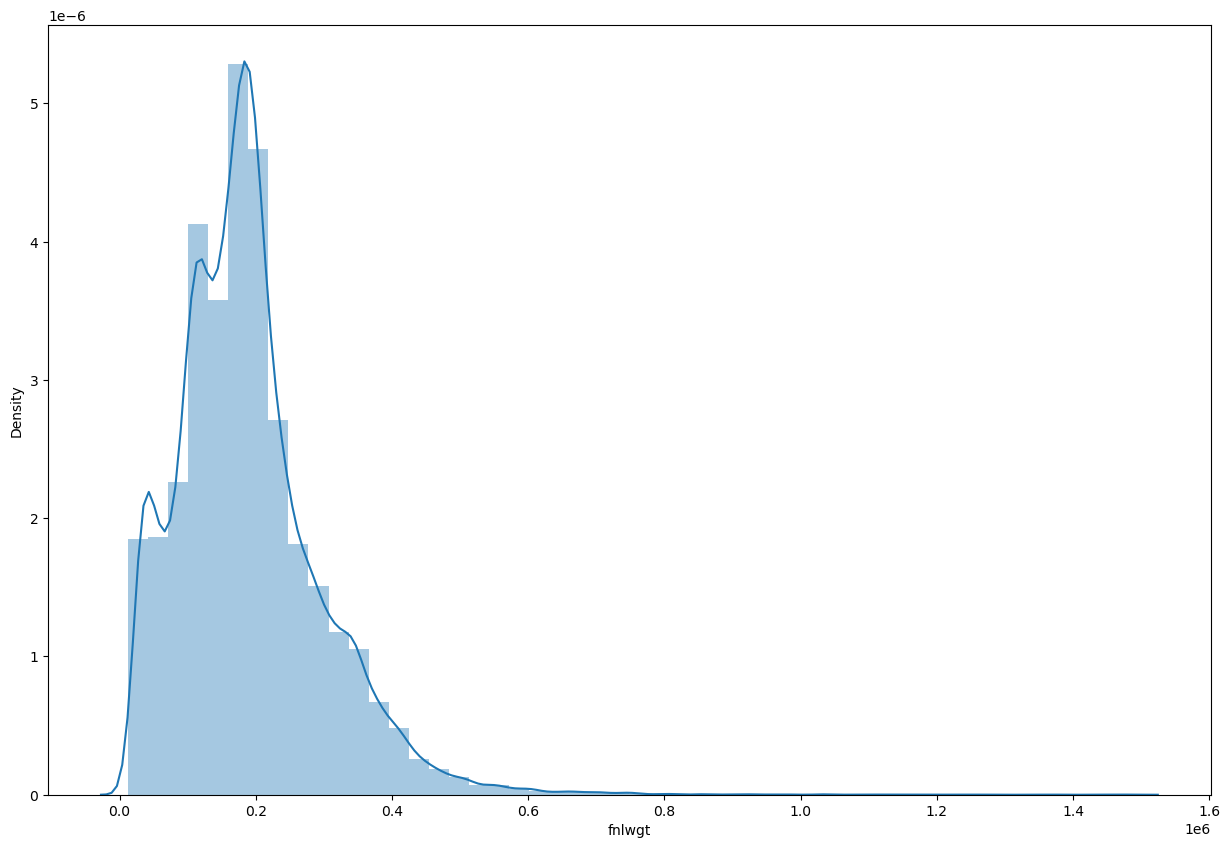

In [12]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['fnlwgt'])
plt.show()

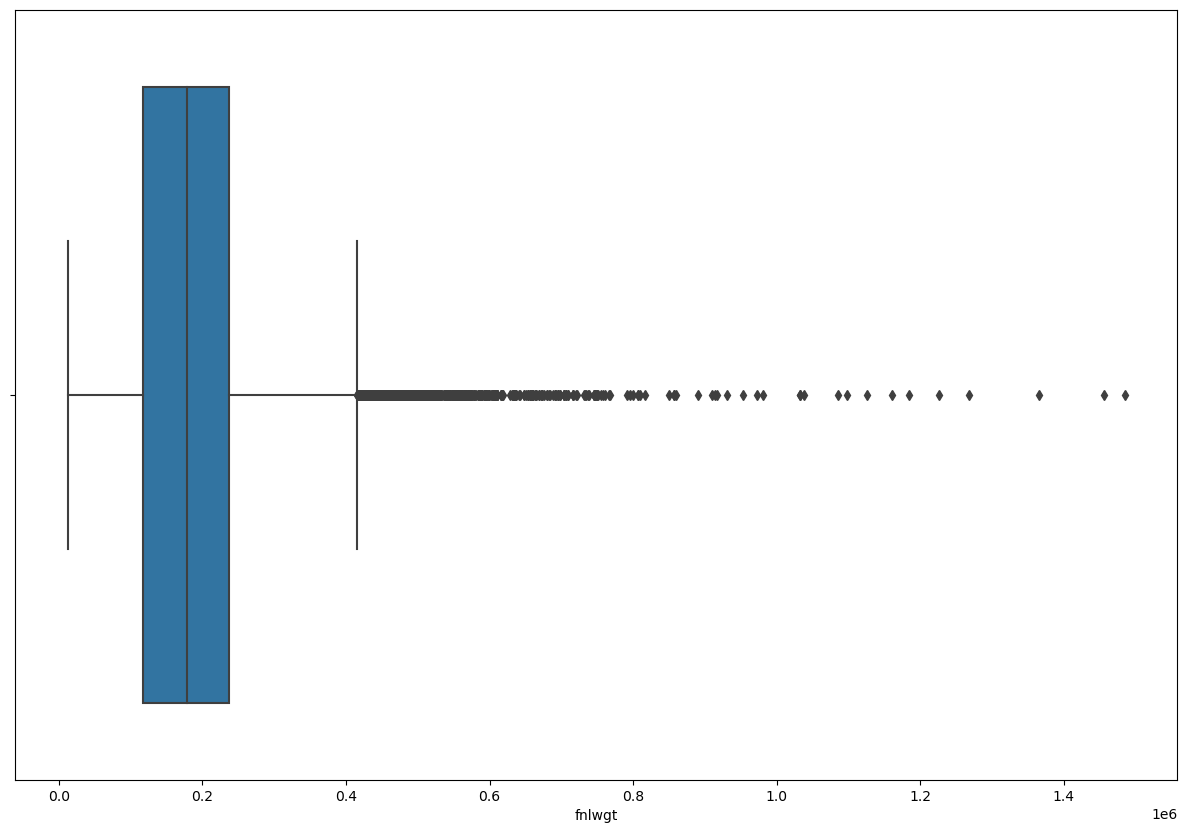

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['fnlwgt'])
plt.show()

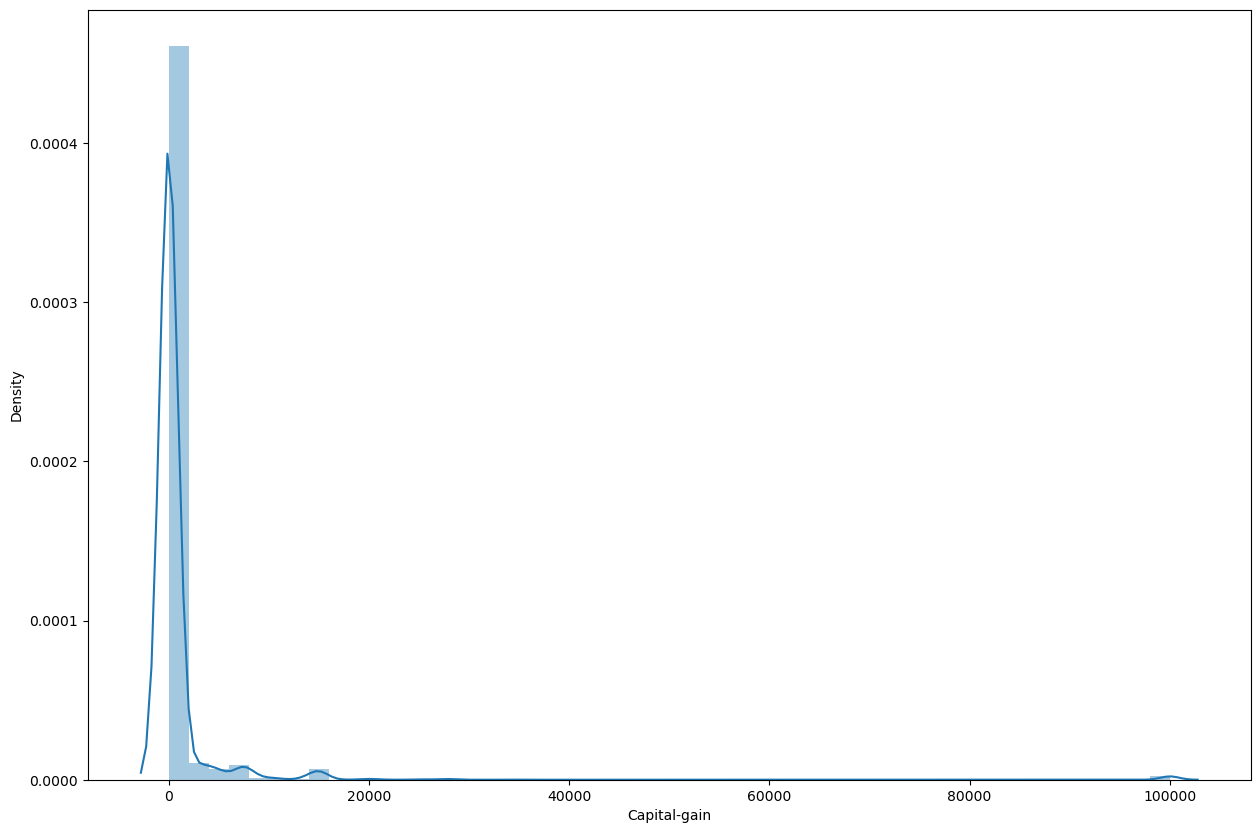

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-gain'])
plt.show()

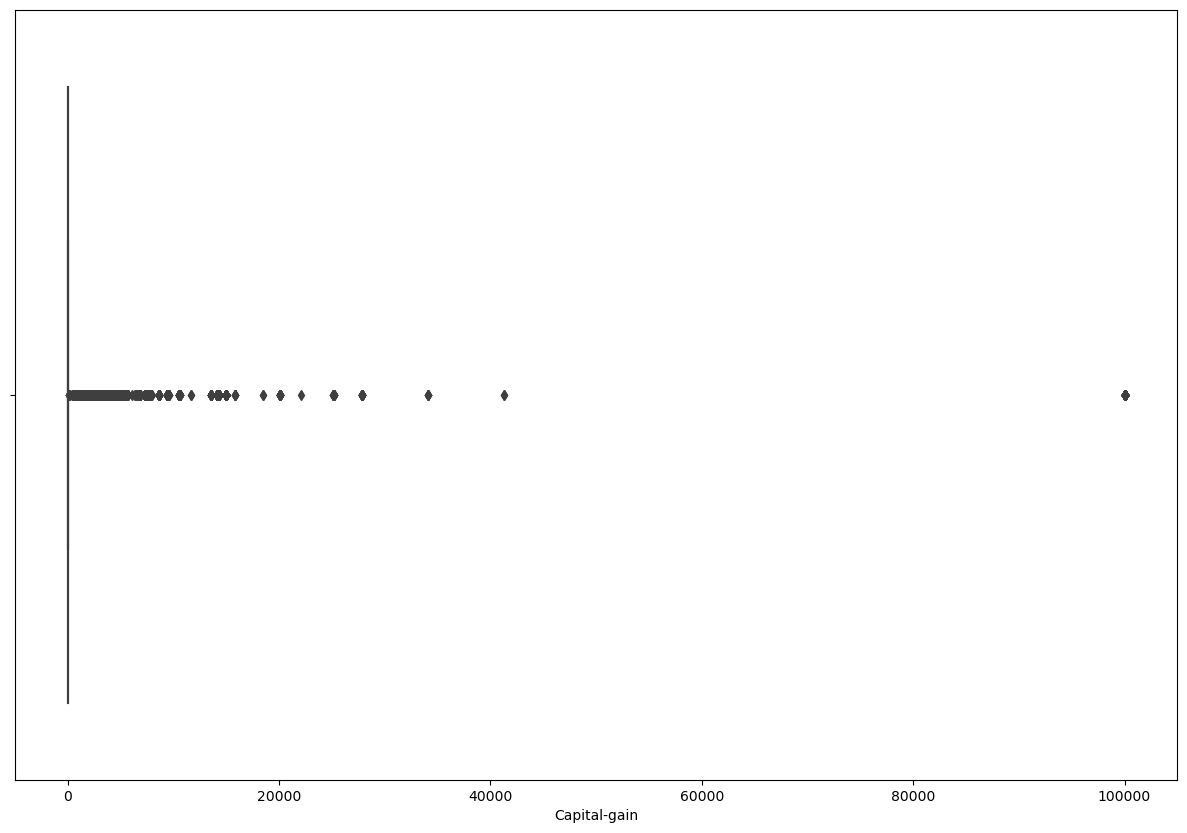

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-gain'])
plt.show()

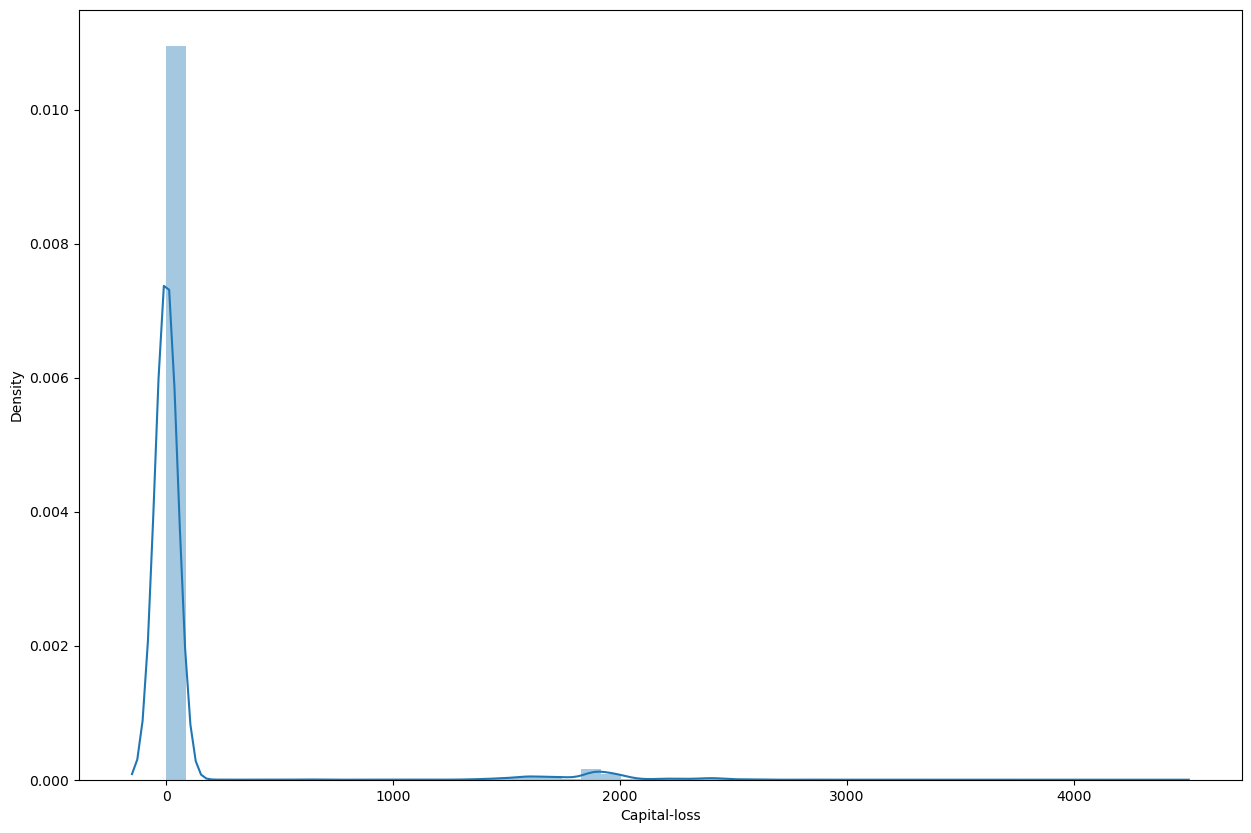

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-loss'])
plt.show()

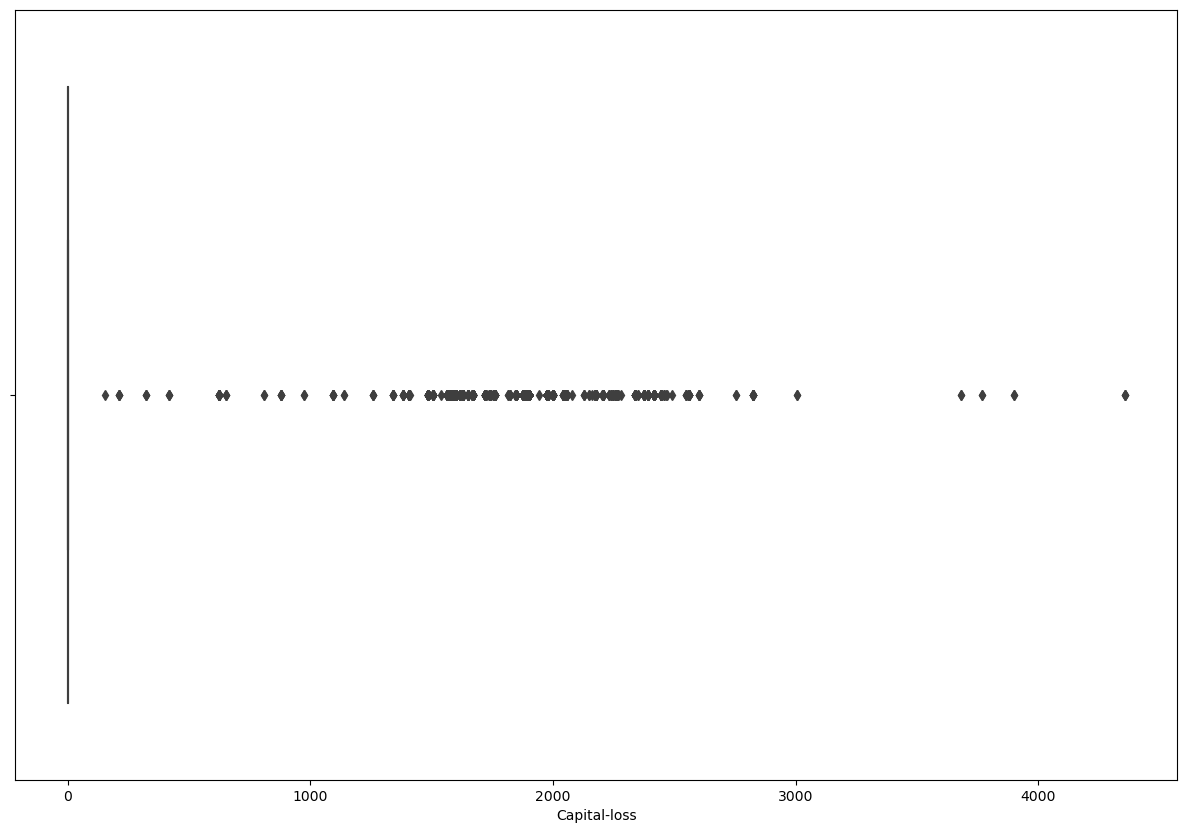

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-loss'])
plt.show()

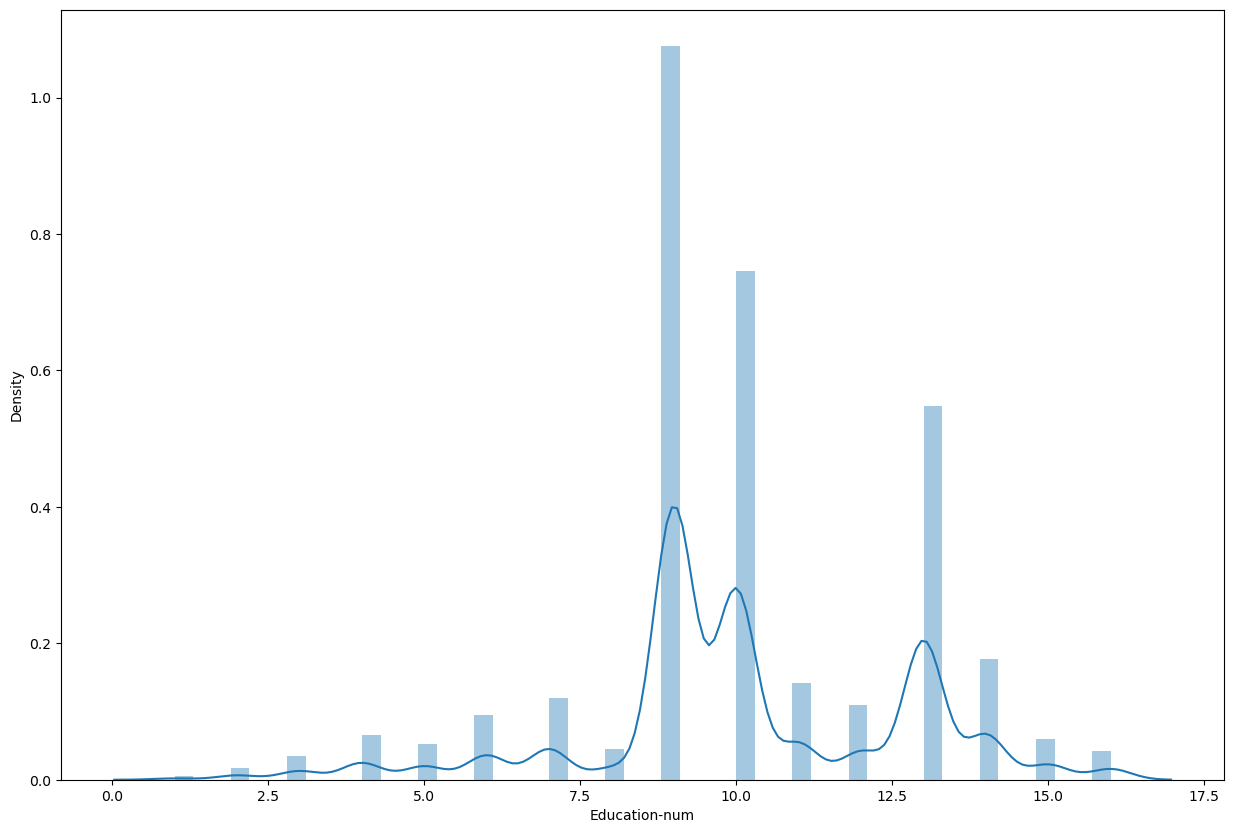

In [18]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Education-num'])
plt.show()

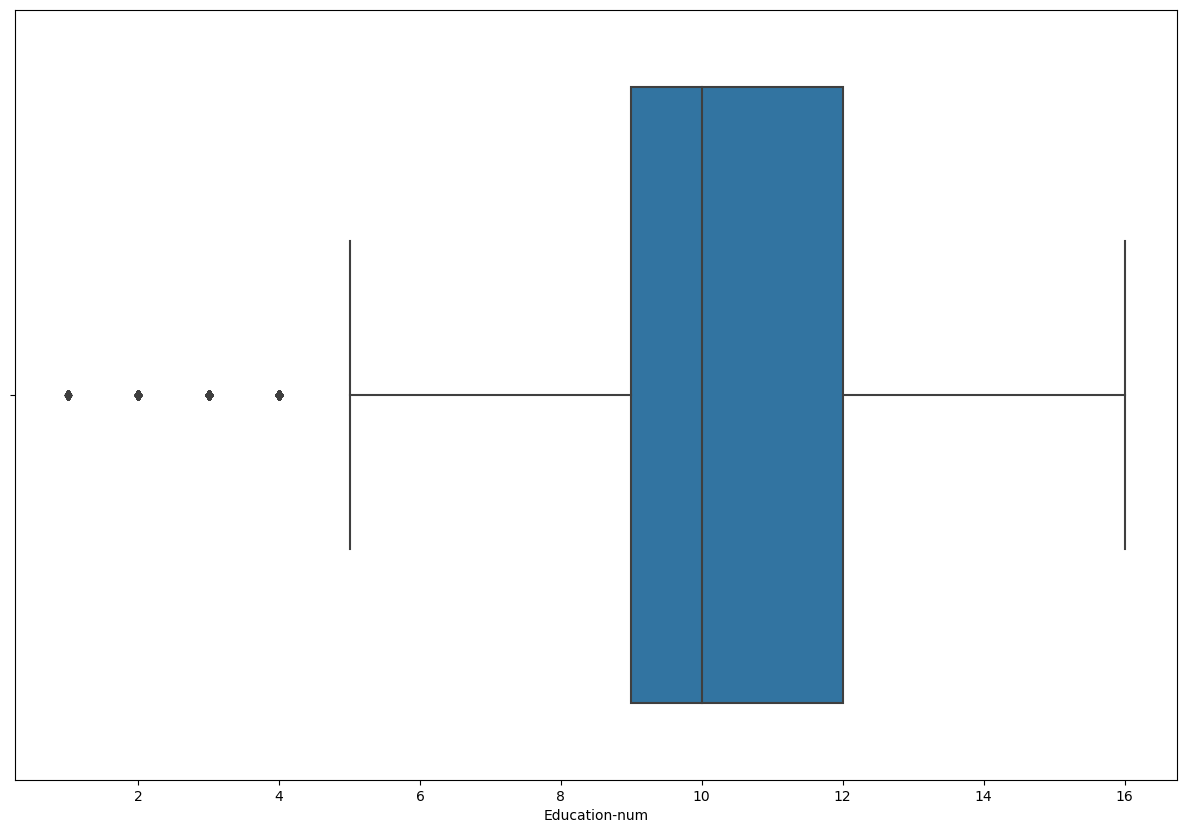

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Education-num'])
plt.show()

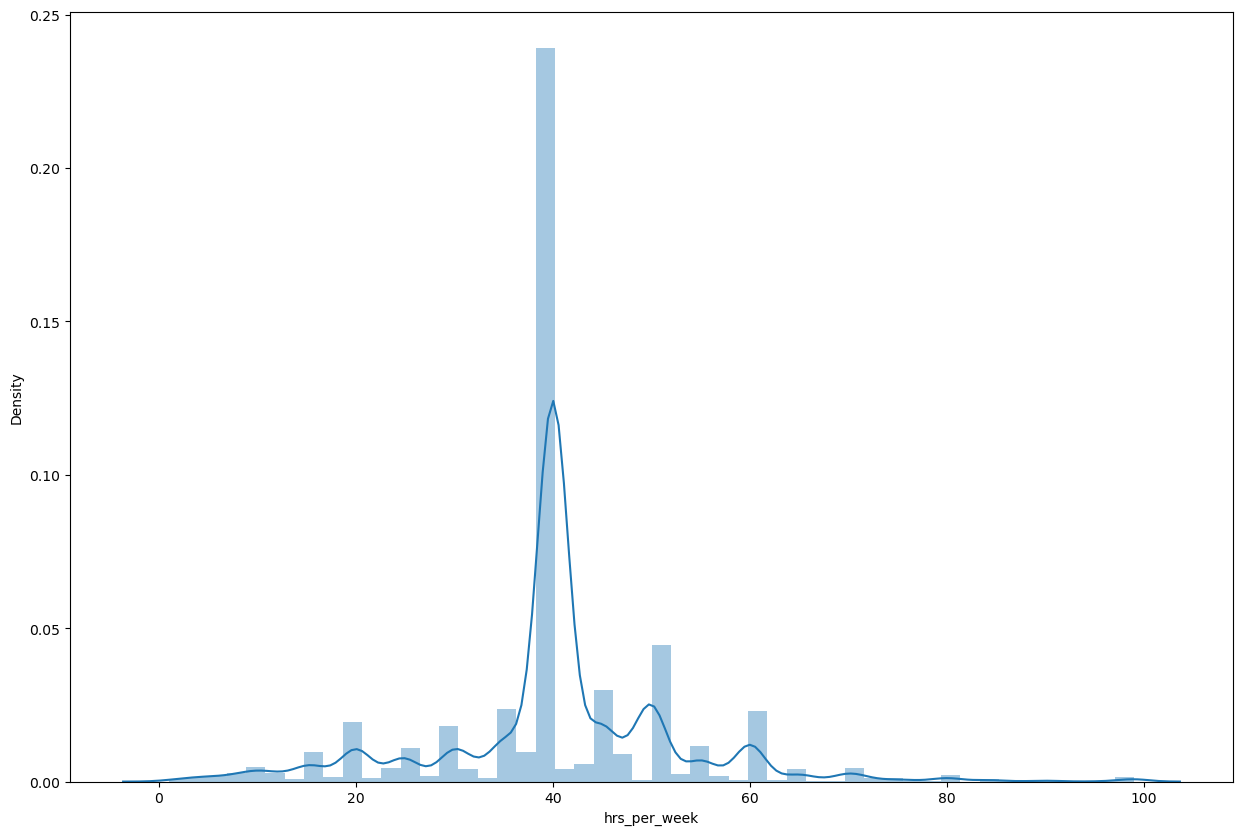

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['hrs_per_week'])
plt.show()

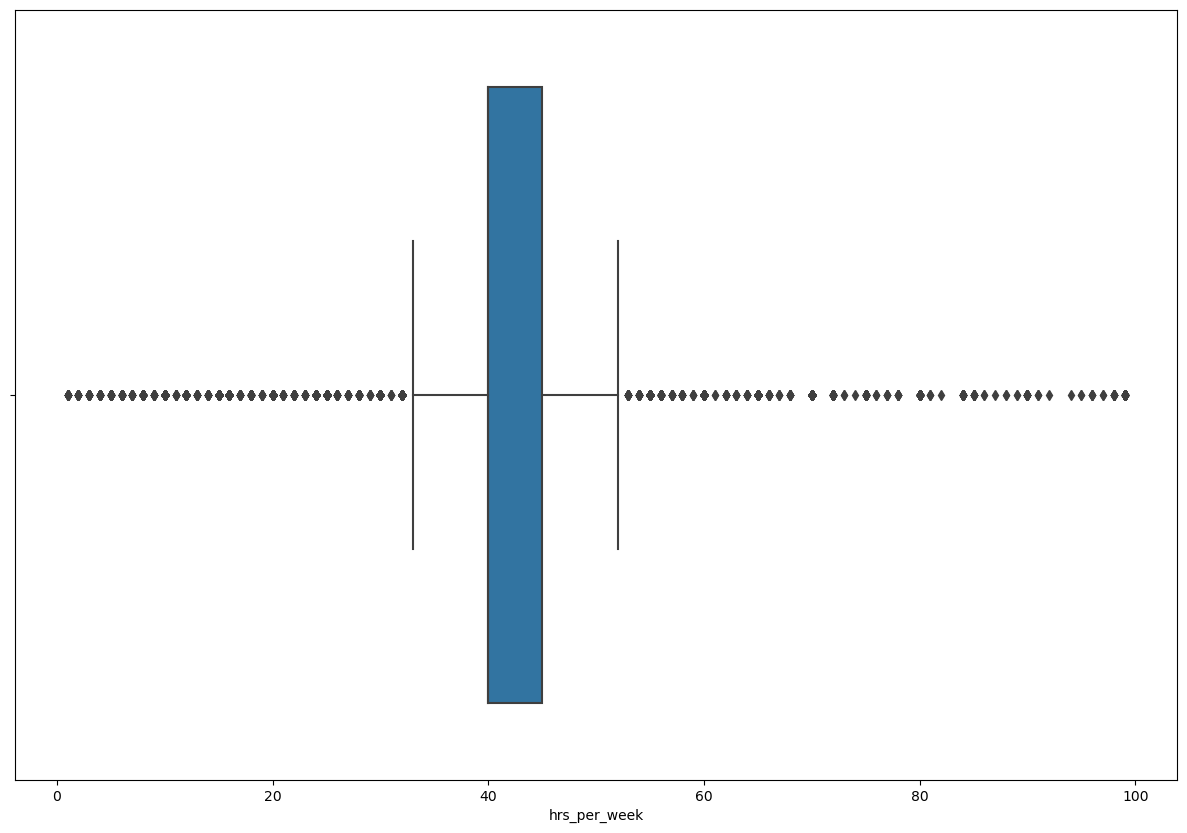

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['hrs_per_week'])
plt.show()

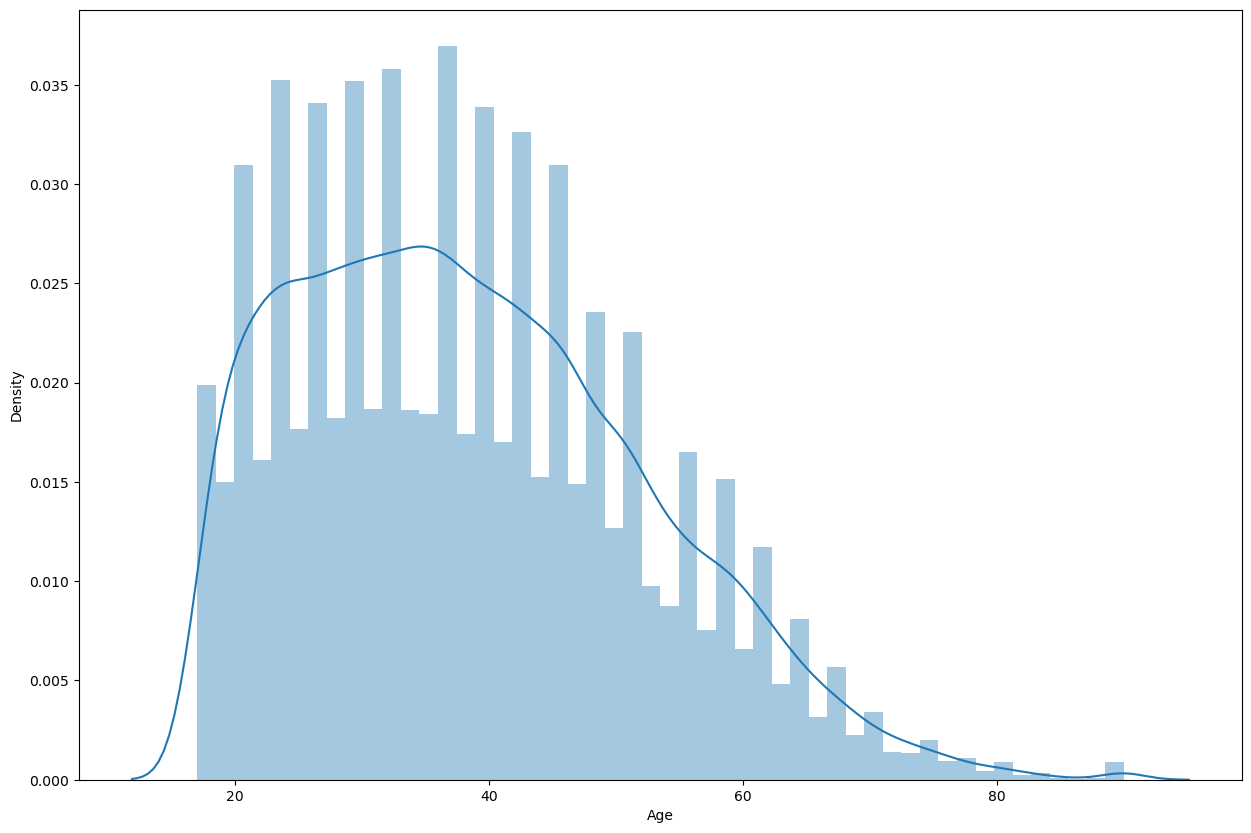

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Age'])
plt.show()


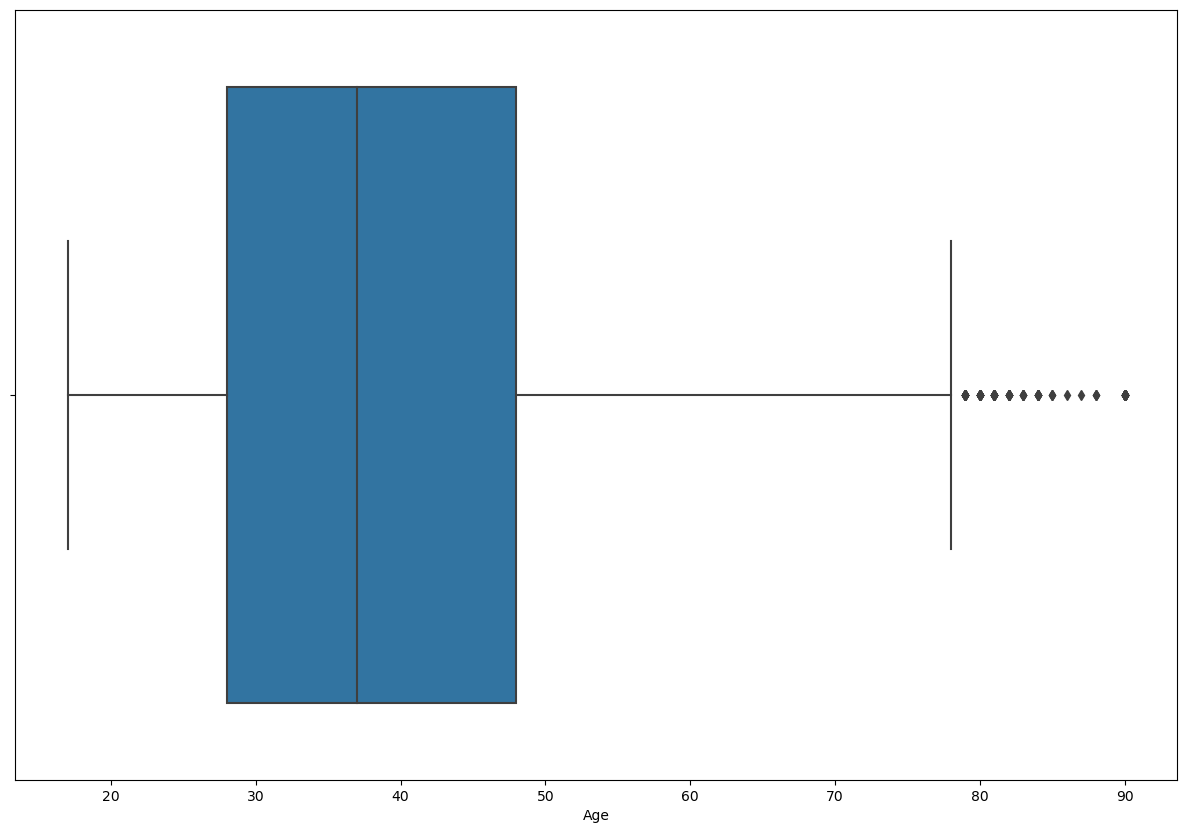

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Age'])
plt.show()

In [24]:
#預處理
#空值處理
null_columns = adult_data.columns[adult_data.isnull().any()]
adult_data[null_columns].isnull().sum()

Series([], dtype: float64)

In [25]:
# adult_data.loc[:, null_columns].mode()

In [26]:
#checking for dataset info before replacing columns.
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
for i in list(null_columns):
    adult_data[i].fillna(adult_data[i].mode().values[0],inplace=True)

In [28]:
print('{null_sum} \n\n {adult_data_info}'.format(null_sum=adult_data.isna().sum(), adult_data_info=adult_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

In [29]:
#標籤編碼
label_encoder = LabelEncoder()
encoded_adult_data = adult_data
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(adult_data[i])
encoded_adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [30]:
#縮放data
#使用minmax
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Earning_potential'] = encoded_adult_data['Earning_potential']
scaled_encoded_adult_data.sample(10)

# encoded_adult_data.head()

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
5100,0.273973,0.500,0.015005,0.333333,0.200000,0.333333,0.357143,0.0,1.0,1.0,0.025800,0.0,0.602041,0.95122,0
29502,0.109589,0.250,0.315341,0.600000,0.800000,0.666667,0.714286,0.2,1.0,0.0,0.000000,0.0,0.397959,0.95122,0
7759,0.328767,0.500,0.025379,0.733333,0.533333,0.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.520408,0.95122,0
29774,0.301370,0.500,0.111971,0.600000,0.800000,0.333333,0.857143,0.0,1.0,1.0,0.150242,0.0,0.500000,0.95122,1
14830,0.589041,0.625,0.247109,0.733333,0.533333,0.333333,0.071429,1.0,1.0,0.0,0.150242,0.0,0.142857,0.95122,1
17064,0.027397,0.500,0.140595,1.000000,0.600000,0.666667,0.857143,0.6,1.0,0.0,0.000000,0.0,0.244898,0.95122,0
4621,0.013699,0.000,0.121454,0.066667,0.400000,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.244898,0.95122,0
20163,0.369863,0.625,0.231378,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.448980,0.95122,1
29671,0.219178,0.250,0.102103,0.800000,0.866667,0.666667,0.714286,0.2,1.0,0.0,0.000000,0.0,0.500000,0.95122,0
26464,0.575342,0.500,0.033686,0.133333,0.466667,0.000000,1.000000,0.4,0.5,1.0,0.000000,0.0,0.346939,0.95122,0


In [31]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                32561 non-null  float64
 1   Workclass          32561 non-null  float64
 2   fnlwgt             32561 non-null  float64
 3   Education          32561 non-null  float64
 4   Education-num      32561 non-null  float64
 5   Marital_Status     32561 non-null  float64
 6   Occupation         32561 non-null  float64
 7   Relationship       32561 non-null  float64
 8   Race               32561 non-null  float64
 9   Sex                32561 non-null  float64
 10  Capital-gain       32561 non-null  float64
 11  Capital-loss       32561 non-null  float64
 12  hrs_per_week       32561 non-null  float64
 13  Native-Country     32561 non-null  float64
 14  Earning_potential  32561 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 3.6 MB


In [32]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


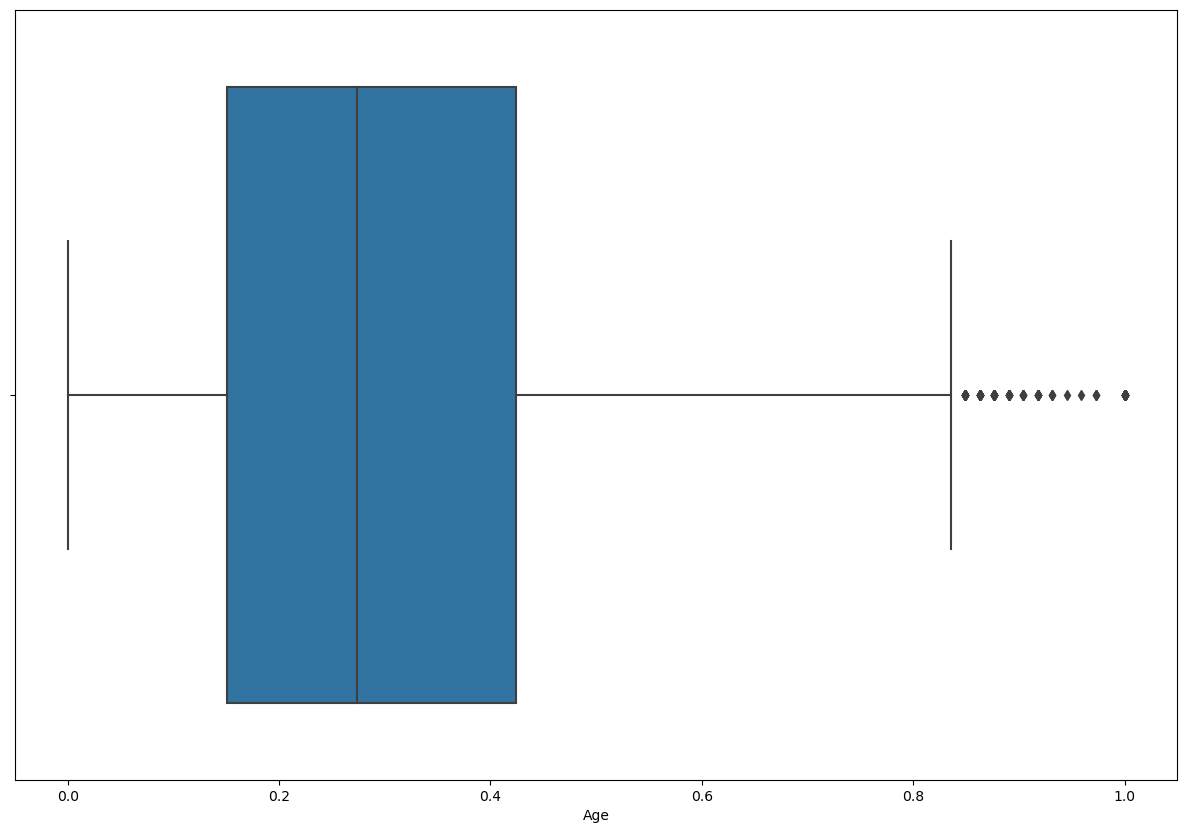

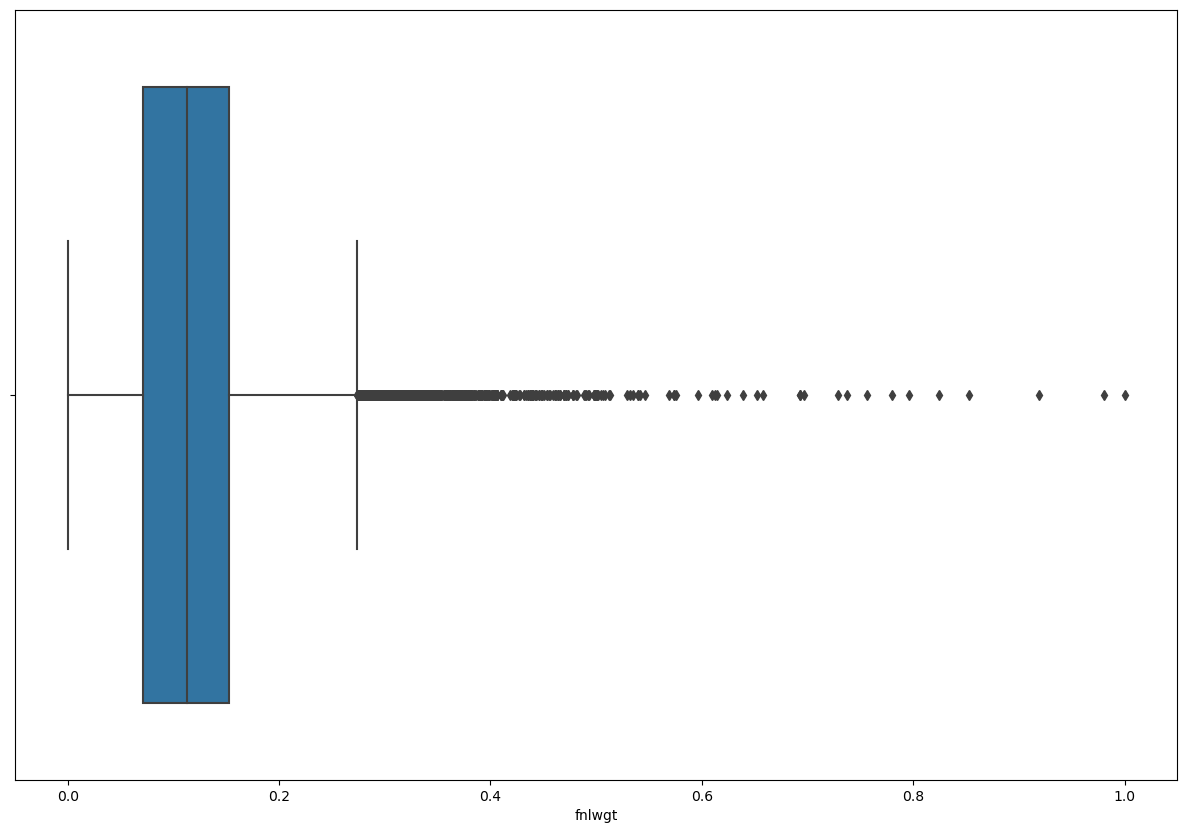

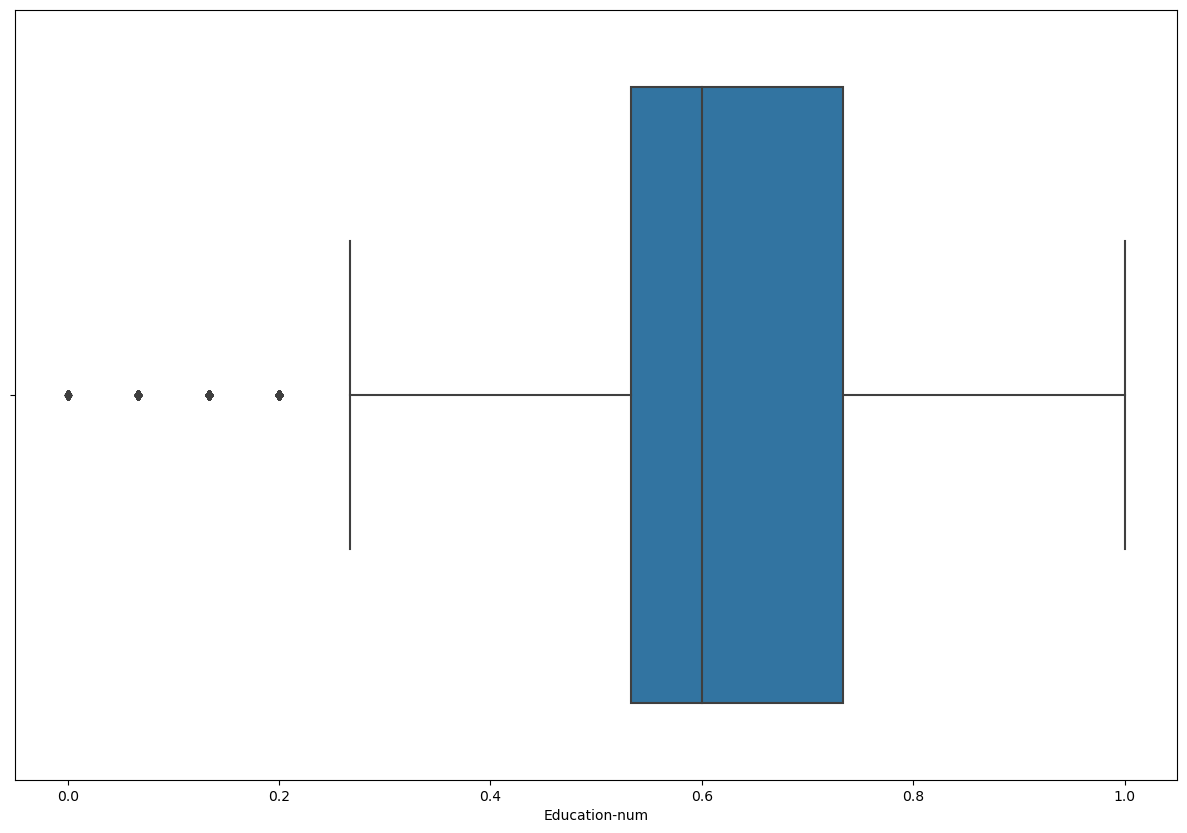

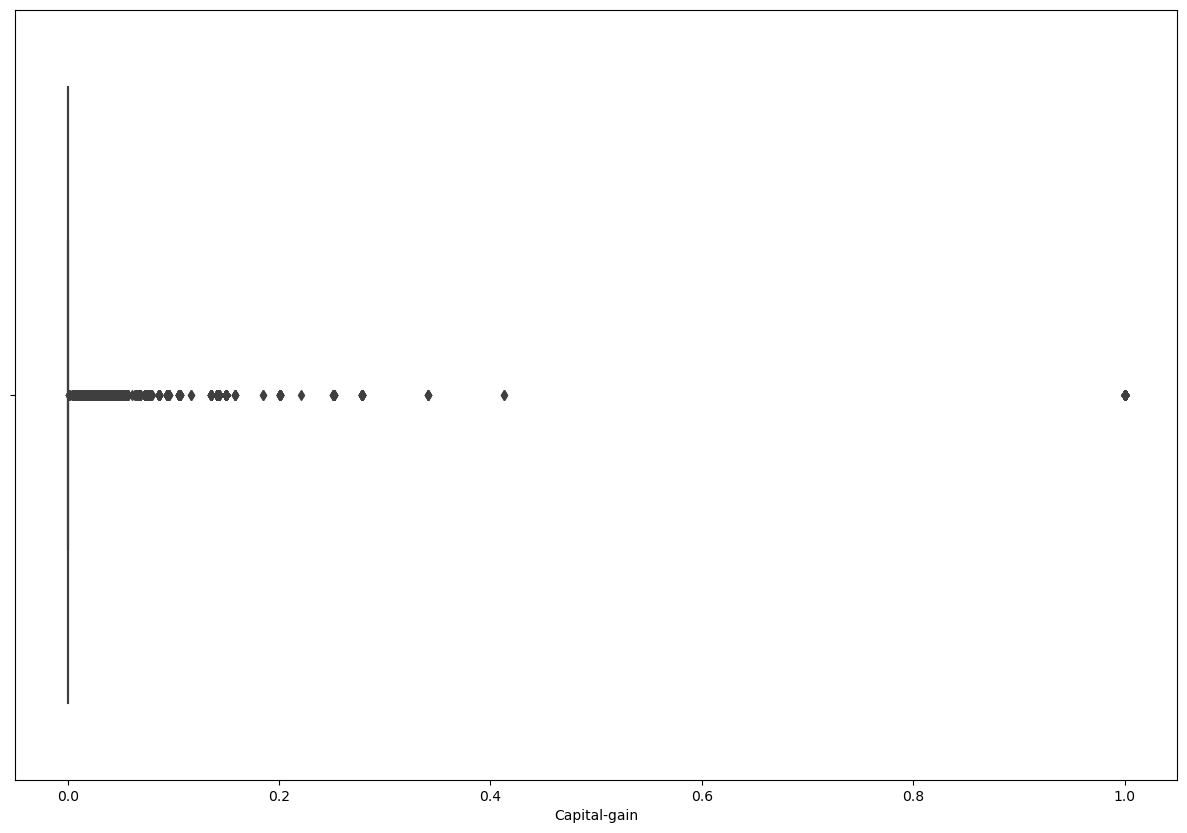

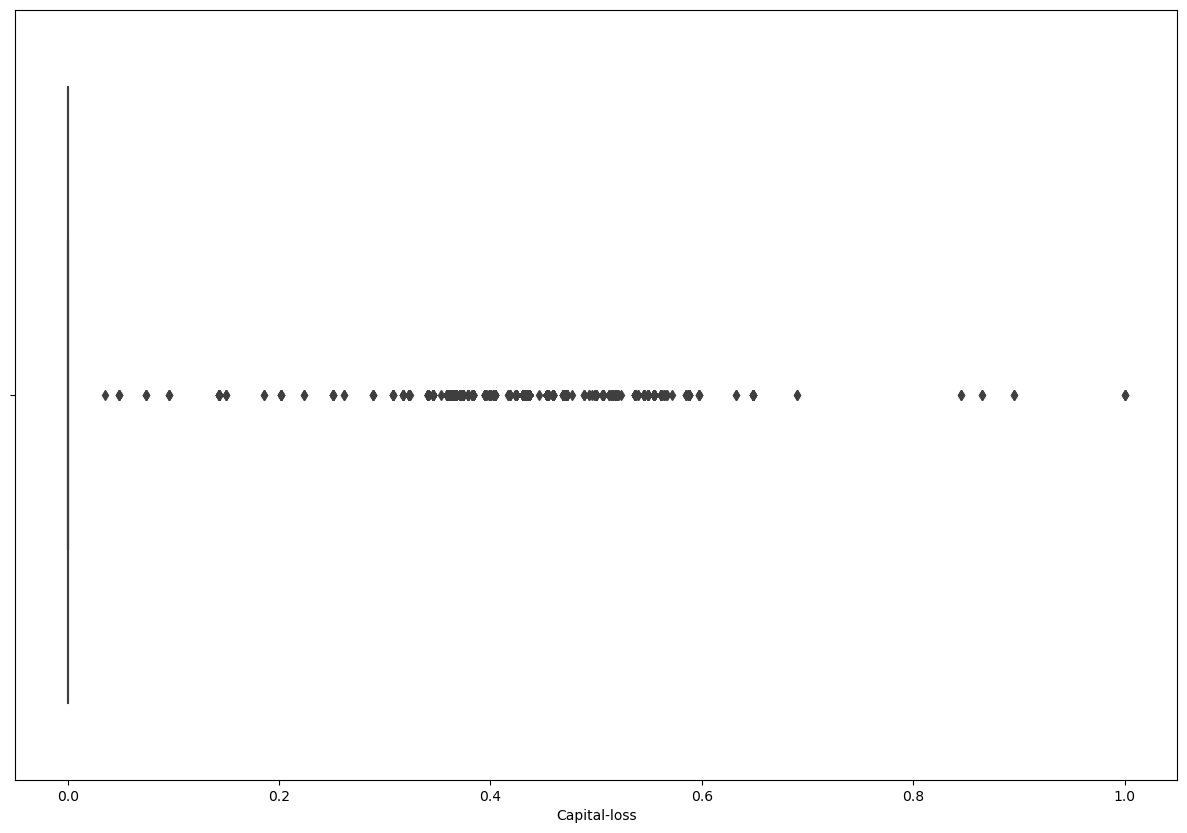

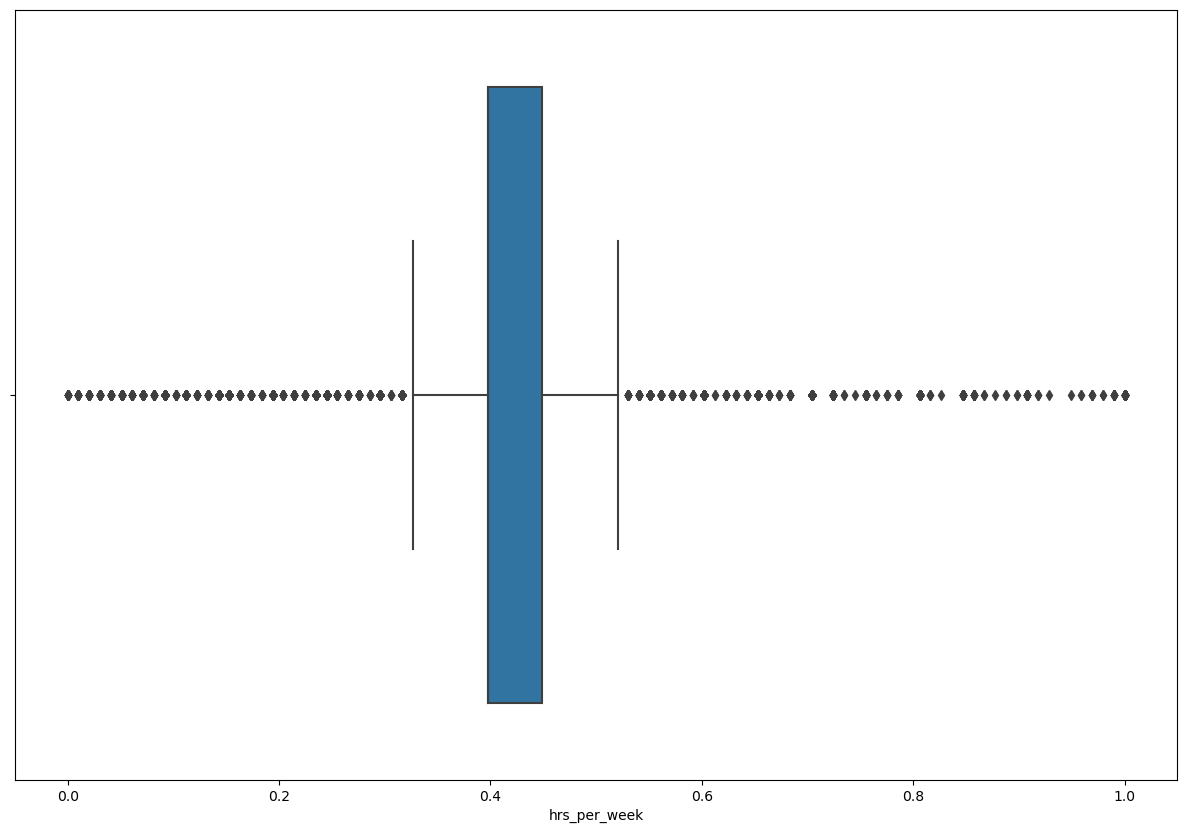

In [33]:
#異常值檢測
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show() 

In [34]:
#異常值處理___替換為中值
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound
# This takes a column of the dataframe (a series), 
# checks for the percentile we want to check it for and then calculates and the upper and lower bounds

In [35]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [36]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.Age < lowerbound) | (scaled_encoded_adult_data.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,0.193878,0.951220,0
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,0.397959,0.951220,0
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,0.234694,0.951220,0
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,0.397959,0.951220,0
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220,0
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.448980,0.951220,0
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,0.346939,0.951220,0
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,0.397959,0.804878,0


In [37]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') #Sparse column, must not be treated
new_columns.remove('Capital-loss') #Sparse column, must not be treated
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

In [38]:
treated_scaled_encoded_adult_data = scaled_encoded_adult_data.copy()

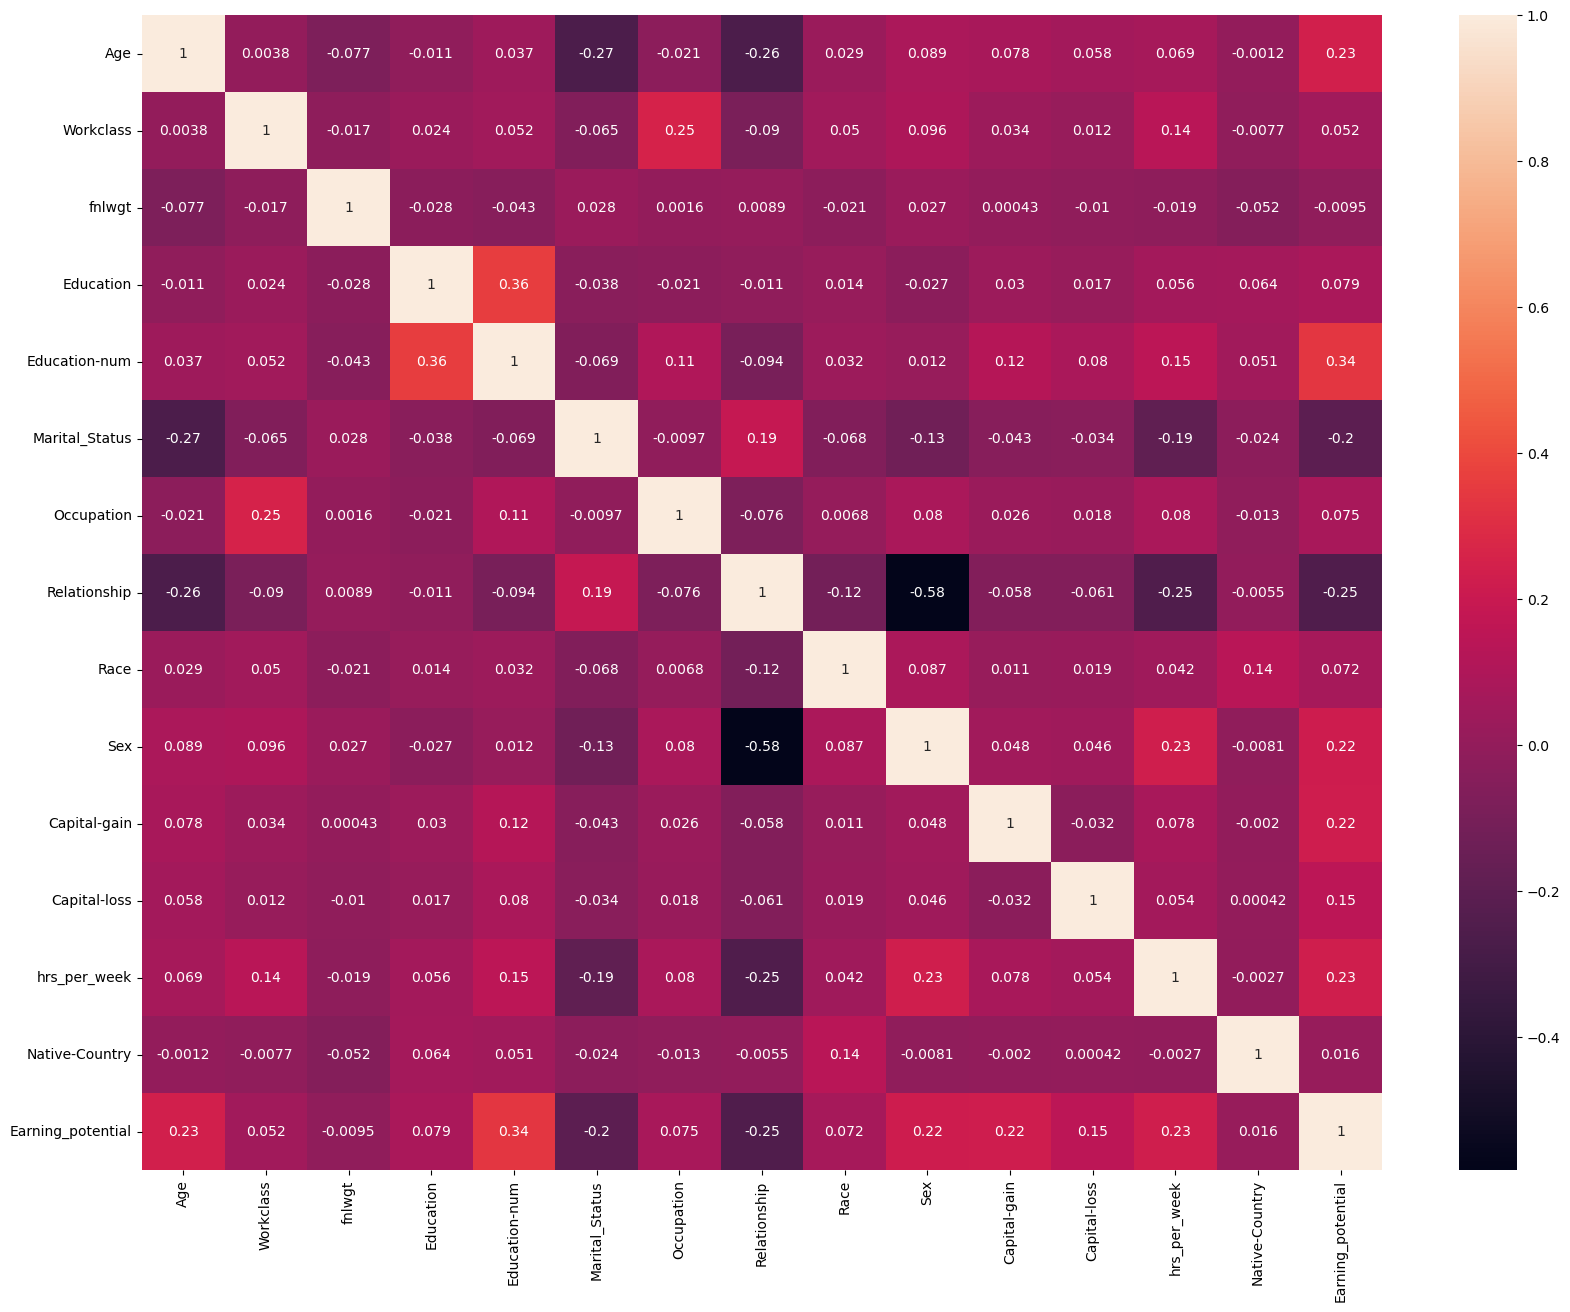

In [39]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data.corr(),annot=True)

In [40]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data['Earning_potential']
print(features)
print(treated_scaled_encoded_adult_data)
print(target)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
#用於訓練的框架
feature_df = treated_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Earning_potential, dtype: int32


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


In [42]:
display(target)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       1
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       0
47       0
48       0
49       0
50       0
51       0
52       1
53       1
54       0
55       1
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       1
64       0
65       0
66       0
67       1
68       1
69       0
70       0
71       0
72       1
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       1
85       0
86       1
87       0
88       0
89       1
90       0

In [43]:
#訓練,驗證,測試
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)
print(y_test)

12330    0
27330    0
17801    1
1627     1
17204    0
17281    0
15095    1
4417     1
18319    0
16629    0
3693     0
20526    0
25590    0
29715    0
23427    0
18000    0
21149    0
28710    0
22334    1
14787    1
17890    0
30973    1
4909     0
27353    0
17416    0
20225    0
10623    0
26694    0
7580     0
16211    0
3829     1
8762     0
3717     0
3042     0
23644    0
17077    1
14084    0
5138     0
30753    1
24840    1
1074     0
7781     0
2516     0
31797    0
24668    0
5848     1
1442     1
30496    1
28807    0
15573    0
21553    0
2093     1
11178    1
12272    0
24284    0
4947     1
23253    0
30275    0
32261    0
18510    0
13973    0
24598    0
21449    1
30523    0
2902     0
9074     0
12335    0
31331    1
24450    1
13339    0
26797    1
32063    1
21831    1
25914    1
14751    0
15768    1
29677    0
6729     0
7823     0
30934    0
17177    0
25855    1
32173    1
16743    0
3518     1
5070     0
19674    0
9222     0
18971    1
25788    0
17006    0

In [44]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


In [45]:
#使用LogisticRegression
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [46]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.8214066339066339
Test Score: 0.8297251650545063


In [47]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)
#效果不好

0.17027483494549364 0.4126437142929644


In [48]:
#換成KNN
#尋找最佳k值
error_rate = []
# Will take some time
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

10


Text(0, 0.5, 'Error Rate')

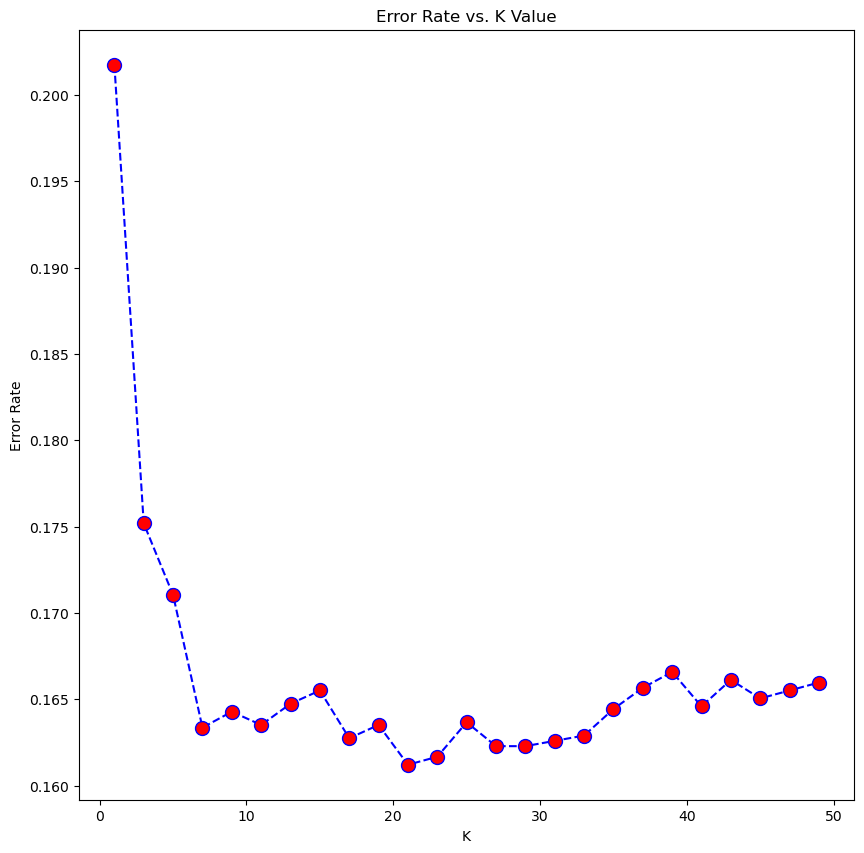

In [49]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [51]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.844210687960688
Test score: 0.8363273453093812


In [52]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.16367265469061876
RMSE: 0.40456477193475304


In [53]:
#向量分類
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [54]:
svc_train_score = svc.score(x_train, y_train)
svc_test_score = svc.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(svc_train_score, svc_test_score))

Train score: 0.8466292997542998
Test score: 0.8499923230462153


In [55]:
svc_prediction = svc.predict(x_test)

svc_mse = mean_squared_error(y_test, svc_prediction)
svc_rmse = np.sqrt(svc_mse)

print('MSE: {}\nRMSE: {}'.format(svc_mse, svc_rmse))

MSE: 0.15000767695378475
RMSE: 0.387308245398655


In [56]:
#決策樹
dtree_classifier = DecisionTreeClassifier(min_impurity_decrease = 0.05)
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [57]:
dtree_train_score = dtree_classifier.score(x_train, y_train)
dtree_test_score = dtree_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(dtree_train_score, dtree_test_score))

Train score: 0.7576781326781327
Test score: 0.7652387532627054


In [58]:
dtree_prediction = dtree_classifier.predict(x_test)

dtree_mse = mean_squared_error(y_test, svc_prediction)
dtree_rmse = np.sqrt(dtree_mse)

print('MSE: {}\nRMSE: {}'.format(dtree_mse, dtree_rmse))

MSE: 0.15000767695378475
RMSE: 0.387308245398655


In [59]:
y_test=y_test.to_frame()
print(y_test.size)
y_test['Predict outcome']=dtree_prediction
print(y_test)
y_test.to_excel("輸出結果.xlsx")

6513
       Earning_potential  Predict outcome
12330                  0                0
27330                  0                0
17801                  1                0
1627                   1                0
17204                  0                0
17281                  0                0
15095                  1                0
4417                   1                0
18319                  0                0
16629                  0                0
3693                   0                0
20526                  0                0
25590                  0                0
29715                  0                0
23427                  0                0
18000                  0                0
21149                  0                0
28710                  0                0
22334                  1                0
14787                  1                0
17890                  0                0
30973                  1                0
4909                   0     